In [1]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_vendo

In [2]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\asus\anaconda3\lib\site-packages\pip\_vendo

In [3]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv("./data.csv", sep=";")

In [5]:
df.shape

(4424, 37)

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
df['Age at enrollment']

0       20
1       19
2       19
3       20
4       45
        ..
4419    19
4420    18
4421    30
4422    20
4423    22
Name: Age at enrollment, Length: 4424, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [10]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## Data preprocessing

In [12]:
# Remove single quotation and tab character from column names

df.columns.str.strip()
df.columns = df.columns.str.replace("'", "").str.replace("\t", "")

In [13]:
# Rename all the columns with underscore for better interpretation

df.rename(columns = {
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime_evening_attendance',
    'Previous qualification': 'previous_qualification',
    'Previous qualification (grade)': 'previous_qualification_grade',
    'Nacionality': 'nationality',
    'Mothers qualification': 'mothers_qualification',
    'Fathers qualification': 'fathers_qualification',
    'Mothers occupation': 'mothers_occupation',
    'Fathers occupation': 'fathers_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'educational_special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'curricular_units_1st_sem_credited',
    'Curricular units 1st sem (enrolled)': 'curricular_units_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'curricular_units_1st_sem_evaluations',
    'Curricular units 1st sem (approved)': 'curricular_units_1st_sem_approved',
    'Curricular units 1st sem (grade)': 'curricular_units_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'curricular_units_1st_sem_without_evaluations',
    'Curricular units 2nd sem (credited)': 'curricular_units_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'curricular_units_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'curricular_units_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'curricular_units_2nd_sem_approved',
    'Curricular units 2nd sem (grade)': 'curricular_units_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'curricular_units_2nd_sem_without_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)

In [14]:
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nationality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_wit

## Exploratory Data Analysis (EDA) and Visualizations

In [15]:
df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [16]:
df['target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

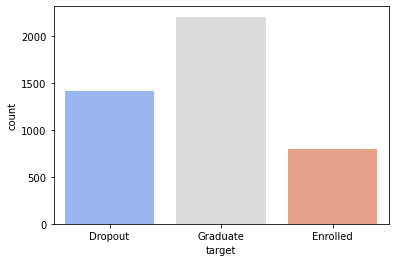

In [17]:
sns.countplot(x='target', data=df, palette='coolwarm')

In [18]:
df = df[df["target"] != "Enrolled"]

In [19]:
df.shape

(3630, 37)

## Bivariate Analysis (One feature vs target)

### Categorical feature analysis

In [20]:
# Define the categorical features

categorical_columns = ['marital_status','application_mode', 'application_order', 'course', 'daytime_evening_attendance','previous_qualification','nationality',
                       'mothers_qualification','fathers_occupation', 'fathers_qualification', 'mothers_occupation', 'displaced', 'educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','international']

In [21]:
# Define key value pair to understand data relations

data_copy = df.copy()
for col in categorical_columns:
    if col == 'marital_status':
      data_copy[col] = data_copy[col].map({1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'})
    elif col == 'gender':
      data_copy[col] = data_copy[col].map({1: 'male', 0: 'female'})
    elif col == 'scholarship_holder':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col =='nationality':
      data_copy[col] = data_copy[col].map({1 :'Portuguese', 2 : 'German', 6 : 'Spanish', 11 : 'Italian', 13 : 'Dutch', 14 : 'English', 17 : 'Lithuanian', 21 : 'Angolan', 22 : 'Cape Verdean', 24 : 'Guinean', 25 : 'Mozambican', 26 : 'Santomean', 32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian', 100 : 'Moldova (Republic of)', 101 : 'Mexican', 103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban', 109 : 'Colombian'})
    elif col == 'course':
       data_copy[col]= data_copy[col].map({33: 'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:  'Social Service (evening attendance)', 9003: 'Agronomy', 9070 : 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130 : 'Equinculture', 9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500: 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

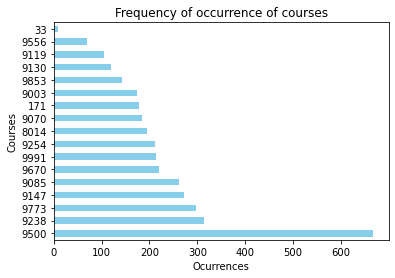

In [22]:
# Visualize the course feature 

course_value_counts = df["course"].value_counts()
course_value_counts.plot(kind='barh', color='skyblue')
plt.title("Frequency of occurrence of courses")
plt.xlabel("Ocurrences")
plt.ylabel("Courses")
plt.show()

In [23]:
# Visualize each categorical variable against target variable

def visualize_categorical_vs_target(df, x_column, target_column, palette="Set2"):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=x_column, hue=target_column, palette=palette)
    plt.xlabel(x_column.capitalize())
    plt.ylabel("Count")
    plt.title(f"{x_column.capitalize()} Distribution Across {target_column.capitalize()}")
    plt.legend(title=target_column.capitalize())
    plt.xticks(rotation=90)
    plt.show()

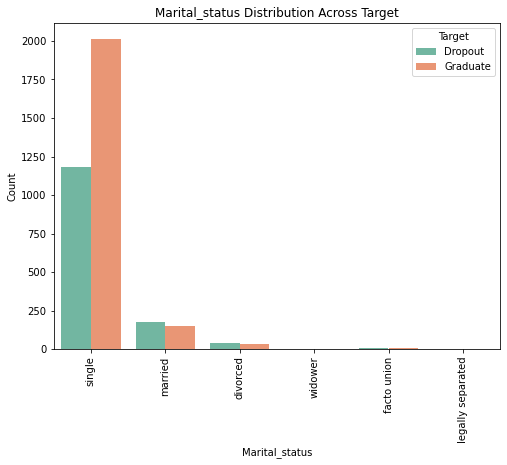

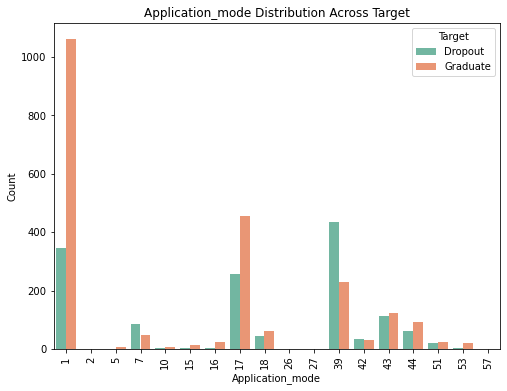

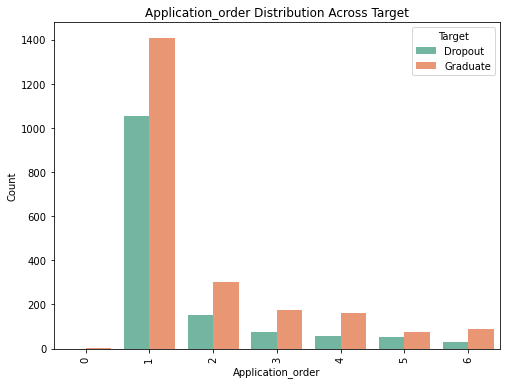

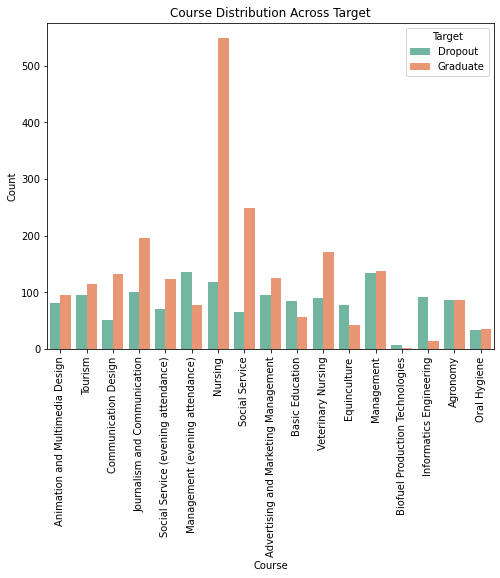

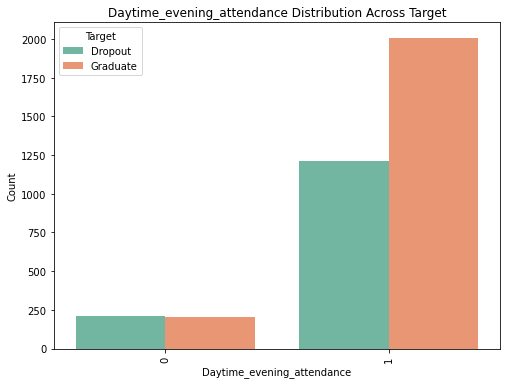

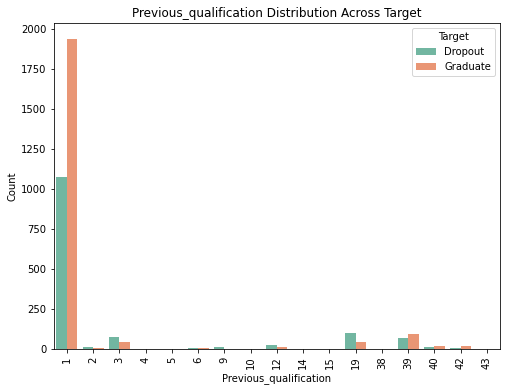

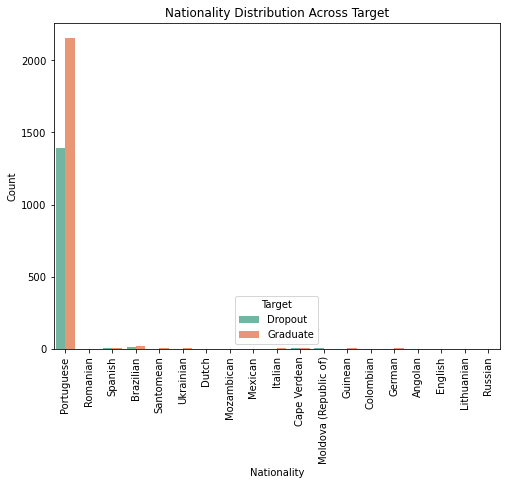

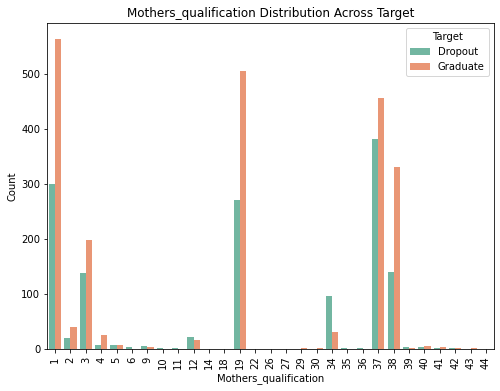

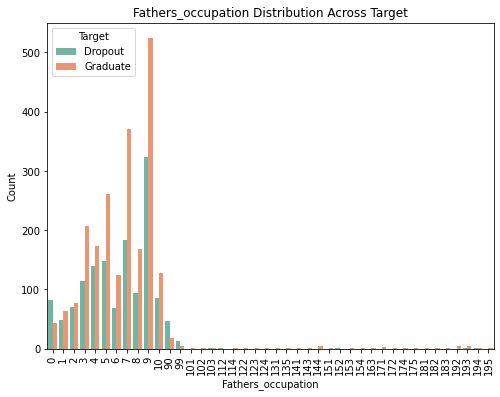

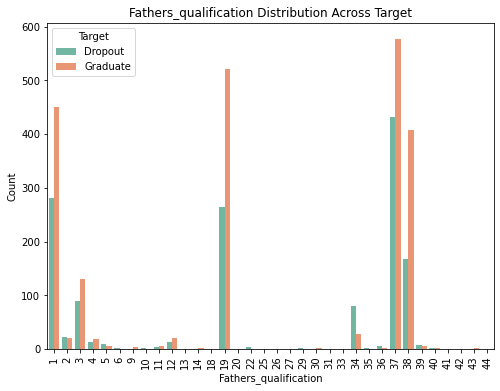

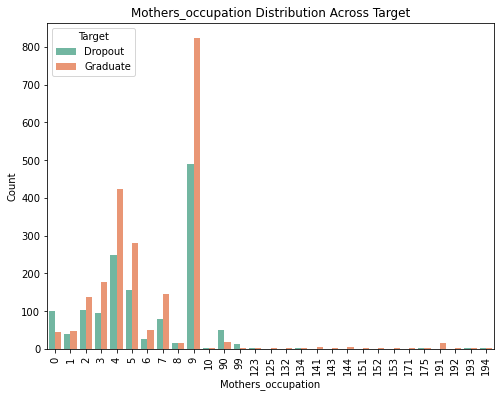

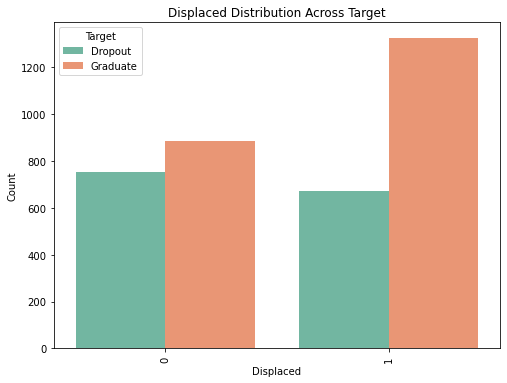

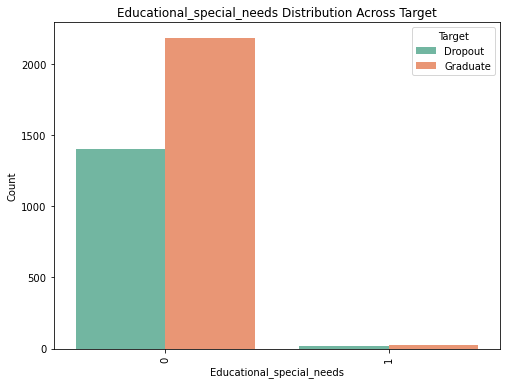

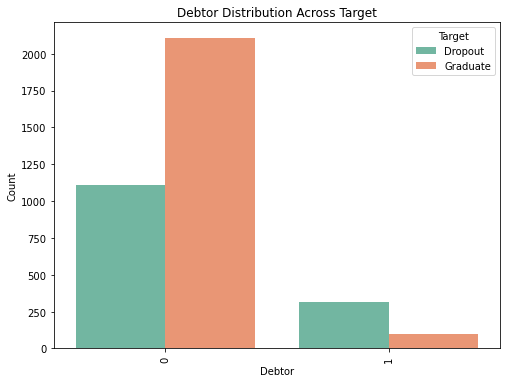

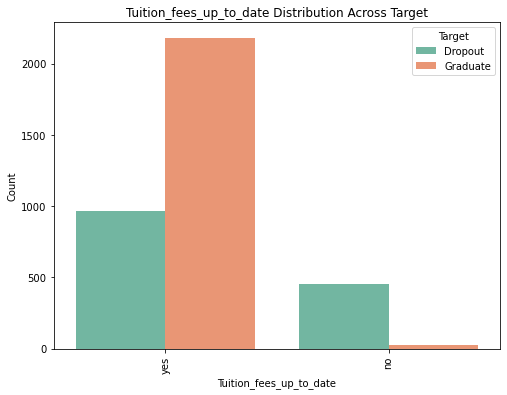

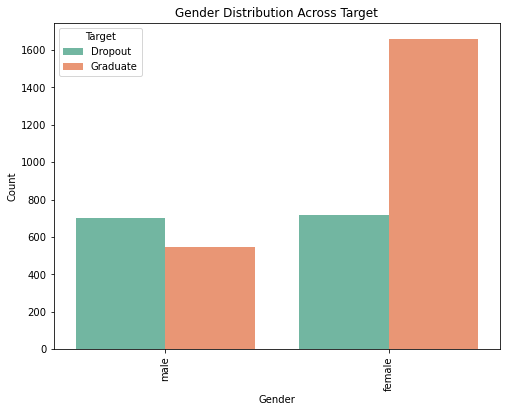

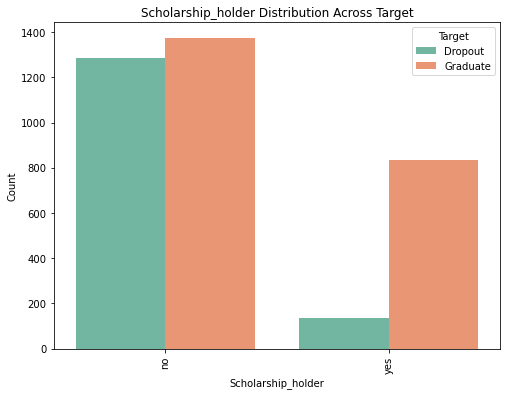

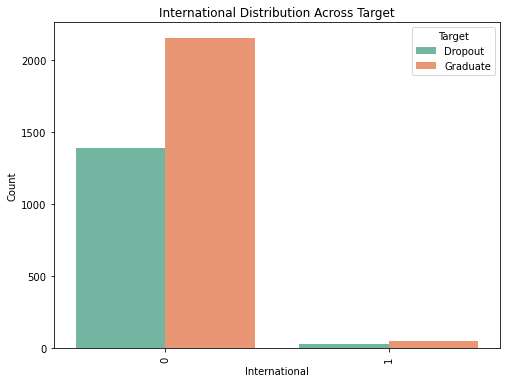

In [24]:
for col in categorical_columns:
    visualize_categorical_vs_target(data_copy, col, "target")

### Numerical variable analysis

In [25]:
target_column = "target"

# Select continuous numerical columns (excluding categorical and target columns)
continuous_cols = [col for col in df.columns if col not in categorical_columns + [target_column]]

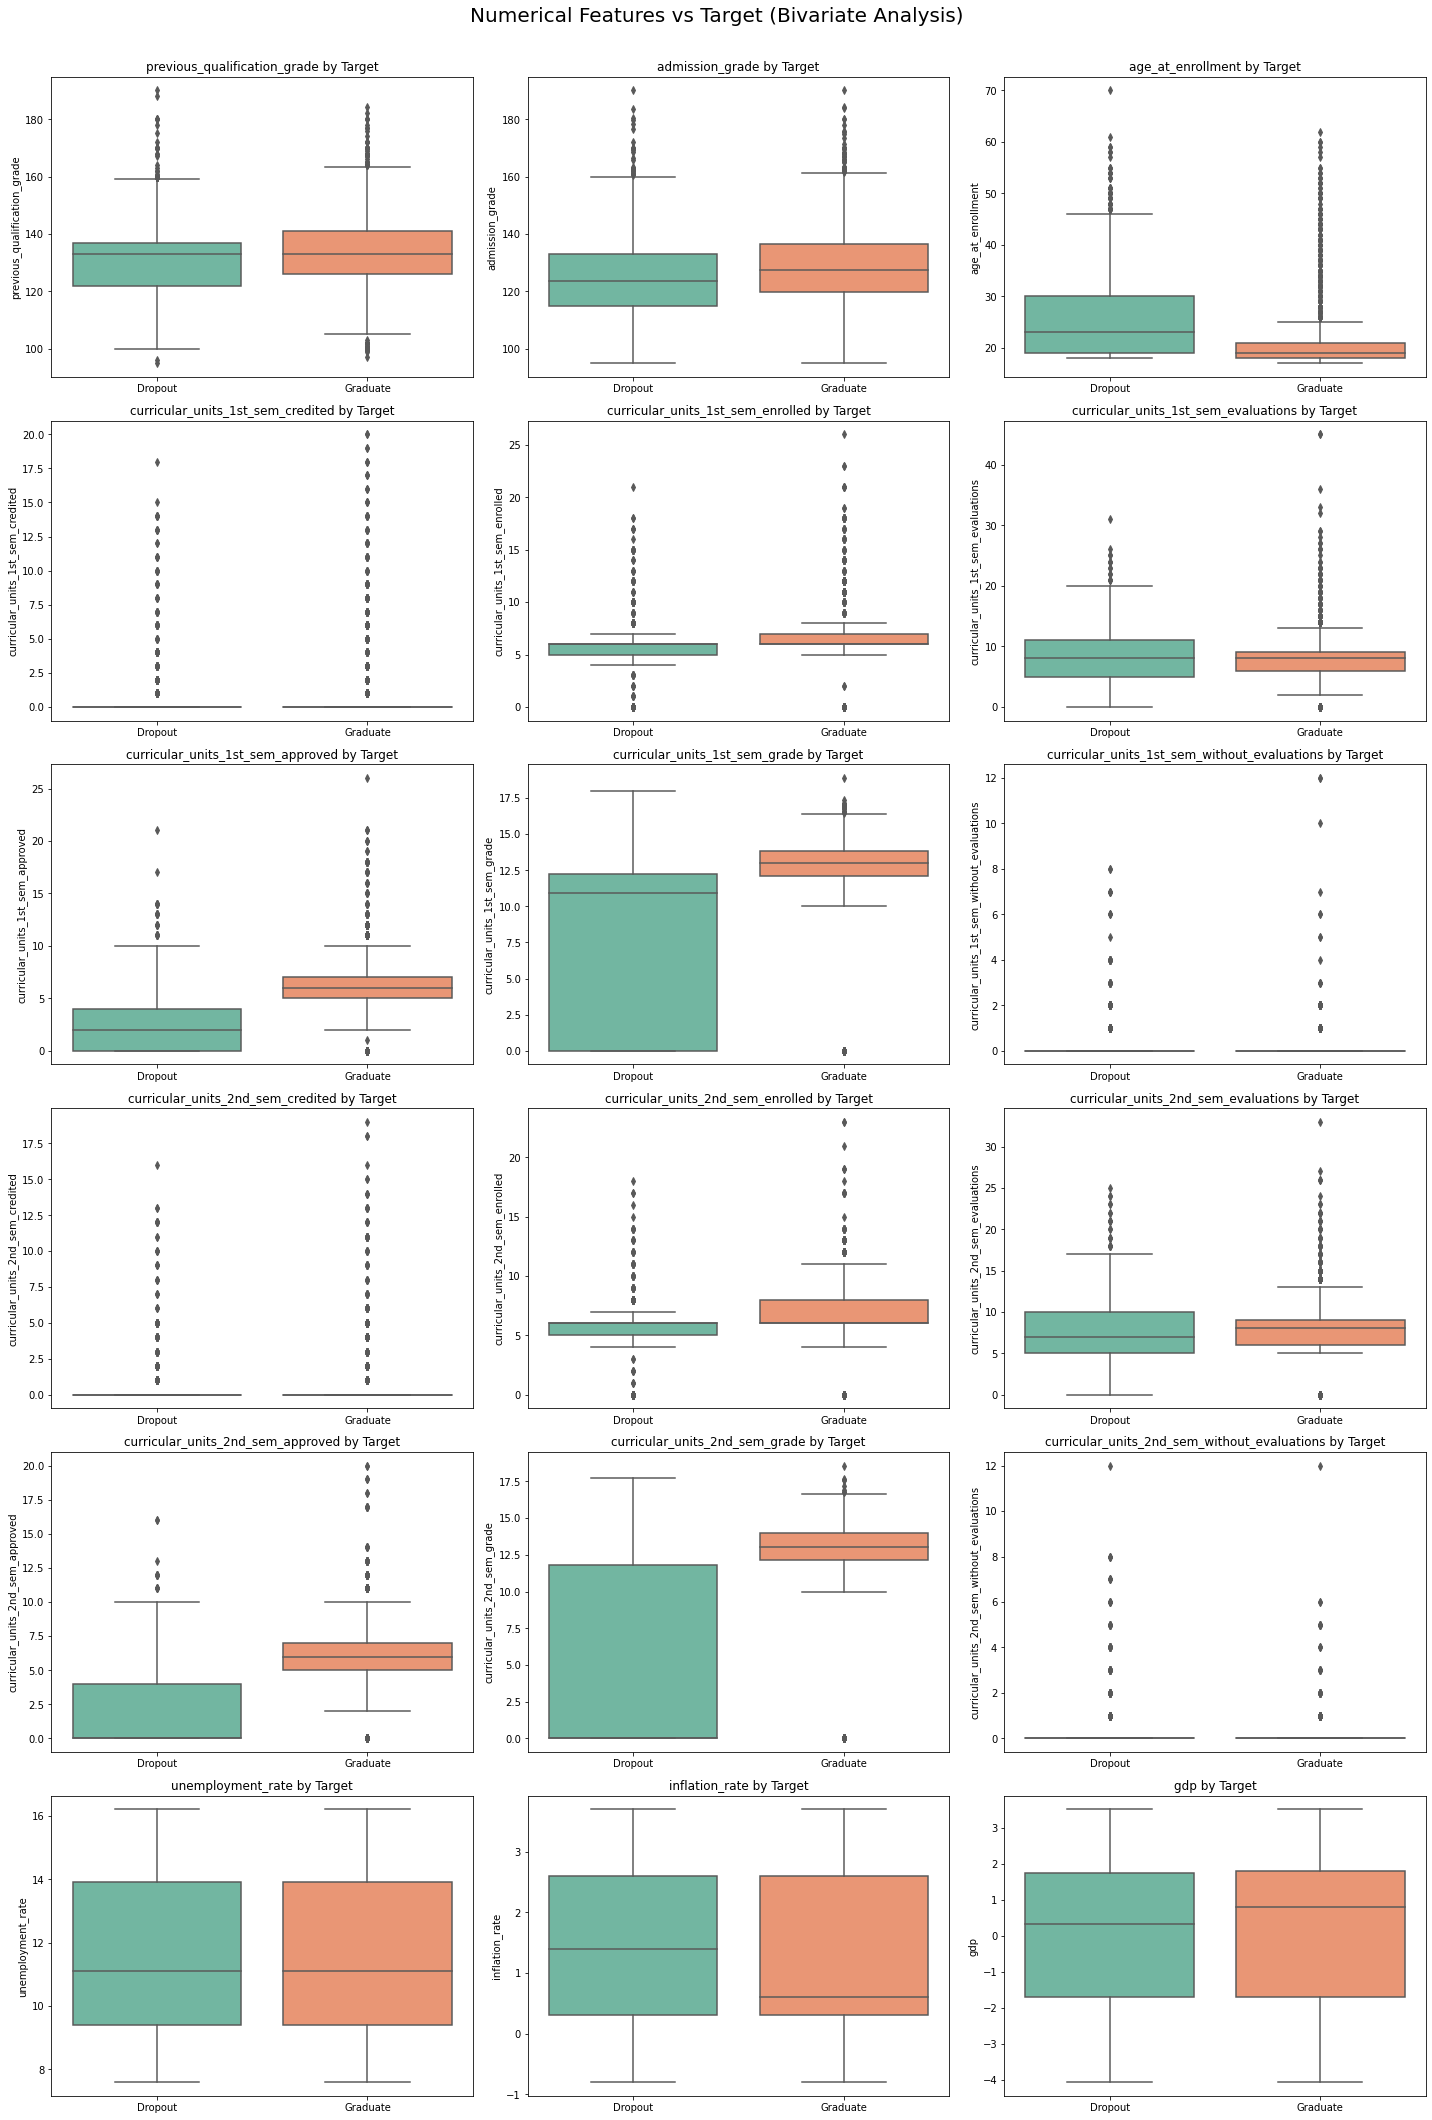

In [26]:
# Visualize each numerical variable against target variable 
num_cols = len(continuous_cols)

# Calculate grid dimensions
num_rows = int(np.ceil(num_cols / 3))
num_cols_per_row = min(3, num_cols)

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 5 * num_rows))
axes = np.array(axes).flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df, x='target', y=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} by Target")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Numerical Features vs Target (Bivariate Analysis)", fontsize=20)
plt.show()

#### Outlier removal using IQR method

In [27]:
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining lower limit and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing the outliers
df_no_outliers = df.copy()
for col in continuous_cols:
    df_no_outliers[col] = df[col].clip(
        lower=lower_limit[col], upper=upper_limit[col])

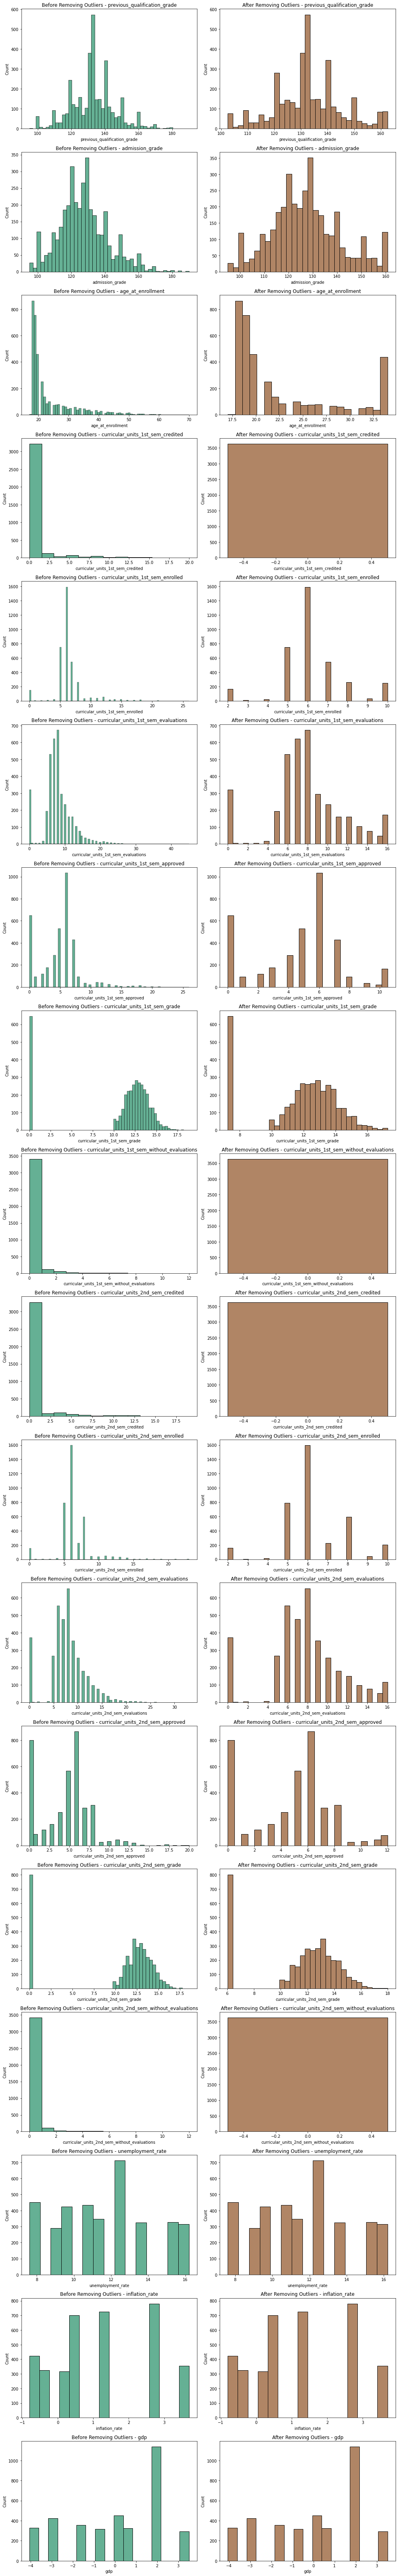

In [28]:
fig, axes = plt.subplots(len(continuous_cols), 2,
                         figsize=(14, 5 * len(continuous_cols)))


for i, col in enumerate(continuous_cols):
    # Before removing outliers
    sns.histplot(data=df, x=col, ax=axes[i, 0], color='#329670')
    axes[i, 0].set_title(f'Before Removing Outliers - {col}')

    # After removing outliers
    sns.histplot(data=df_no_outliers, x=col, ax=axes[i, 1], color='#965c32')
    axes[i, 1].set_title(f'After Removing Outliers - {col}')

plt.tight_layout()
plt.show()

In [29]:
# Update the df
df = df_no_outliers

### Correlation analysis

In [30]:
# Set the threshold for high correlation
threshold = 0.85

# Find pairs of highly correlated variables
high_corr_pairs = set()
correlation_matrix = df.drop('target', axis=1).corr()
correlation_matrix = correlation_matrix.abs()  # Using absolute values for easier analysis

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

# Print highly correlated variable pairs
print("Highly Correlated Feature Pairs (>|0.85|):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} <--> {col2}")


Highly Correlated Feature Pairs (>|0.85|):
fathers_occupation <--> mothers_occupation
curricular_units_2nd_sem_enrolled <--> curricular_units_1st_sem_enrolled
curricular_units_2nd_sem_approved <--> curricular_units_1st_sem_approved


In [31]:
corr_columns = ["mothers_occupation", 
                "curricular_units_2nd_sem_enrolled", 
                "curricular_units_2nd_sem_approved"]

df = df.drop(columns=corr_columns)

## Multivariate Analysis (Interactions among multiple features)

### PCA analysis

In [32]:
df_binary = df.copy()

In [33]:
df_binary["target"] = df["target"].map({"Graduate": 1, "Dropout": 0})

In [34]:
X = df_binary.drop(columns=["target"]) # define features
y = df_binary["target"] # define target
feature_names = X.columns  # save feature names before scaling

#### Standadization

In [35]:
 # Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

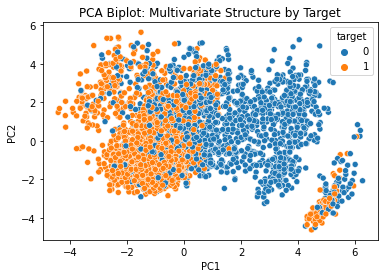

In [36]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['target'] = y.values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
plt.title("PCA Biplot: Multivariate Structure by Target")
plt.show()


## Handling class imbalance

In [37]:
smote = SMOTE(sampling_strategy=0.9, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

## Model training

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [39]:
def evaluate_model(
    model, X_train, X_test, y_train, y_test,
    feature_names=None, cv=5, explained_variance=None
):
    print(f"\n Evaluating: {model.__class__.__name__}")
    results = {}  # Dictionary to hold results

    # Time tracking
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start
    print(f"Training Time: {training_time:.3f} seconds")
    results['Training Time (s)'] = round(training_time, 3)

    # Prediction Time
    start = time.time()
    y_pred = model.predict(X_test)
    end = time.time()
    prediction_time = end - start
    print(f"Prediction taken: {prediction_time:.3f} seconds")
    results['Prediction Time (s)'] = round(prediction_time, 3)


    # Check for overfitting
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy:  {test_acc:.3f}")
    results['Train Accuracy'] = round(train_acc, 3)
    results['Test Accuracy'] = round(test_acc, 3)

    if train_acc - test_acc > 0.1:
        print("Likely Overfitting: High train accuracy but lower test accuracy.")
        results['Overfitting Check'] = 'Yes'
    else:
        results['Overfitting Check'] = 'No'

    # Memory usage and model size
    model_size = sys.getsizeof(model) / 1024  # Size in KB
    print(f"Model Size: {model_size:.2f} KB")
    results['Model Size (KB)'] = round(model_size, 2)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross-Validation (cv={cv}): {np.mean(cv_scores):.3f}")
    results['Cross-Validation Score'] = round(np.mean(cv_scores), 3)
    
    bias_variance = train_acc - test_acc
    print(f"Bias-Variance Trade-off: {bias_variance:.3f}")
    results['Bias-Variance Trade-off'] = round(bias_variance, 3)
    
    # Curse of Dimensionality check
    if X_train.shape[1] > X_train.shape[0]:
        print("Warning: More features than samples — possible curse of dimensionality!")

    # Explained Variance (if PCA was applied)
    if explained_variance is not None:
        exp_var_cum = np.cumsum(explained_variance)
        print(f"PCA Explained Variance (95% threshold): {exp_var_cum[exp_var_cum < 0.95].shape[0]} components")
        plt.plot(exp_var_cum, marker='o')
        plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
        plt.title("Explained Variance by PCA Components")
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred) if hasattr(model, "predict_proba") else "N/A"

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {auc}")
    results['Accuracy'] = round(accuracy, 3)
    results['Precision'] = round(precision, 3)
    results['Recall'] = round(recall, 3)
    results['F1-Score'] = round(f1, 3)
    results['ROC-AUC'] = auc if auc != "N/A" else "Not Available"
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy trade-off insights
    recall = report['1']['recall']
    precision = report['1']['precision']
    if recall < 0.6 or precision < 0.6:
        print("Tradeoff Alert: High accuracy but low recall or precision for positive class.")

    # Confusion Matrix
    cfmatrix = confusion_matrix(y_test, y_pred)
    results['cfmatrix'] = cfmatrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cfmatrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            y_scores = None

        if y_scores is not None:
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            auc = roc_auc_score(y_test, y_scores)
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"ROC Curve - {model.__class__.__name__}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("ROC Curve not supported for this model.")
    except:
        print("ROC Curve calculation failed.")

    # Feature Importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        importances = model.coef_[0]
    else:
        importances = None

    if importances is not None and feature_names is not None:
        feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feat_df = feat_df.sort_values(by="Importance", ascending=False).head(10)
        results['Top Features'] = feat_df.to_dict()
        print(results['Top Features'])
        
        plt.figure(figsize=(8, 6))
        sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")
        plt.title(f"Top 10 Features - {model.__class__.__name__}")
        plt.tight_layout()
        plt.show()
    elif importances is None:
        print("Feature importance not available for this model.")

    
    # Support Vector Count (for SVM)
    if hasattr(model, "support_vectors_"):
        print(f"Number of Support Vectors: {len(model.support_vectors_)}")
        results['Number of Support Vectors'] = len(model.support_vectors_)


    # Coefficients (Logistic Regression)
    if hasattr(model, "coef_"):
        coef_df = pd.DataFrame(model.coef_[0], index=feature_names, columns=["Coefficient"])
        print("\nFeature Coefficients:")
        print(coef_df.sort_values(by="Coefficient", ascending=False))
        results['Coefficient Summary'] = coef_df.sort_values(by="Coefficient", ascending=False).to_dict()
        
        
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
    print("\nModel Evaluation Summary:")
    print(results_df)

## Random forest


 Evaluating: RandomForestClassifier
Training Time: 2.199 seconds
Prediction taken: 0.047 seconds
Train Accuracy: 1.000
Test Accuracy:  0.893
Likely Overfitting: High train accuracy but lower test accuracy.
Model Size: 0.05 KB
Cross-Validation (cv=5): 0.902
Bias-Variance Trade-off: 0.107
Accuracy: 0.893
Precision: 0.879
Recall: 0.923
F1-Score: 0.901
ROC-AUC: 0.8911867027444917

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       398
           1       0.88      0.92      0.90       442

    accuracy                           0.89       840
   macro avg       0.89      0.89      0.89       840
weighted avg       0.89      0.89      0.89       840



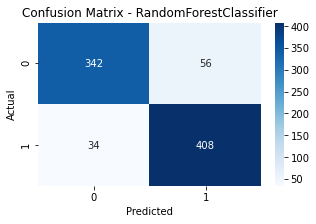

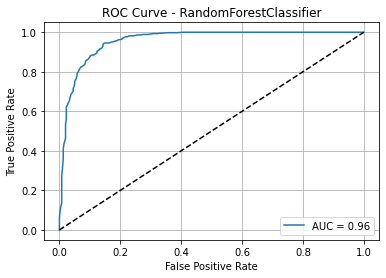

{'Feature': {28: 'curricular_units_2nd_sem_grade', 23: 'curricular_units_1st_sem_approved', 24: 'curricular_units_1st_sem_grade', 15: 'tuition_fees_up_to_date', 27: 'curricular_units_2nd_sem_evaluations', 18: 'age_at_enrollment', 11: 'admission_grade', 3: 'course', 17: 'scholarship_holder', 6: 'previous_qualification_grade'}, 'Importance': {28: 0.1799539648778165, 23: 0.159811018013328, 24: 0.10016934416196004, 15: 0.06888419590680203, 27: 0.05013129643281121, 18: 0.04219919968840565, 11: 0.03486622053223353, 3: 0.034692442132297566, 17: 0.034163912079619344, 6: 0.03146452420364986}}


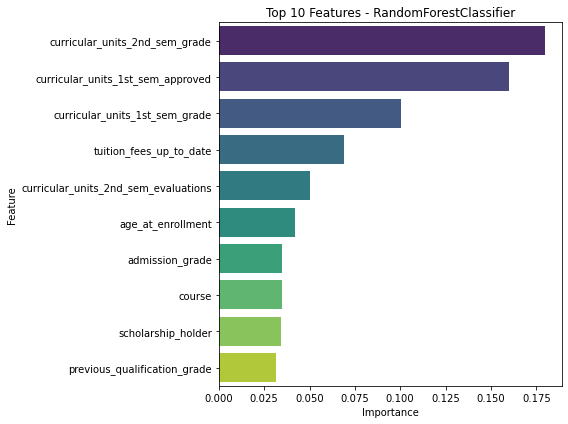


Model Evaluation Summary:
                                                                     Value
Training Time (s)                                                    2.199
Prediction Time (s)                                                  0.047
Train Accuracy                                                         1.0
Test Accuracy                                                        0.893
Overfitting Check                                                      Yes
Model Size (KB)                                                       0.05
Cross-Validation Score                                               0.902
Bias-Variance Trade-off                                              0.107
Accuracy                                                             0.893
Precision                                                            0.879
Recall                                                               0.923
F1-Score                                                             0.90

In [40]:
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test, feature_names=feature_names)

## Decision Tree


 Evaluating: DecisionTreeClassifier
Training Time: 0.066 seconds
Prediction taken: 0.000 seconds
Train Accuracy: 0.892
Test Accuracy:  0.865
Model Size: 0.05 KB
Cross-Validation (cv=5): 0.875
Bias-Variance Trade-off: 0.026
Accuracy: 0.865
Precision: 0.822
Recall: 0.950
F1-Score: 0.881
ROC-AUC: 0.8607915141317448

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       398
           1       0.82      0.95      0.88       442

    accuracy                           0.87       840
   macro avg       0.88      0.86      0.86       840
weighted avg       0.87      0.87      0.86       840



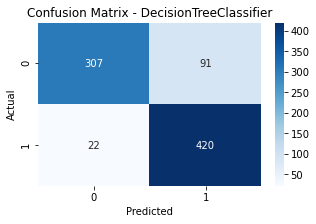

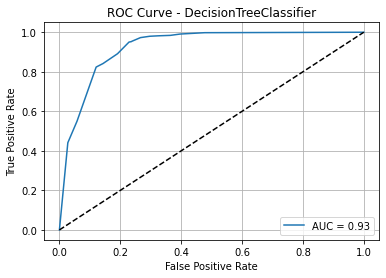

{'Feature': {23: 'curricular_units_1st_sem_approved', 15: 'tuition_fees_up_to_date', 28: 'curricular_units_2nd_sem_grade', 3: 'course', 27: 'curricular_units_2nd_sem_evaluations', 11: 'admission_grade', 18: 'age_at_enrollment', 6: 'previous_qualification_grade', 24: 'curricular_units_1st_sem_grade', 16: 'gender'}, 'Importance': {23: 0.6191485596845473, 15: 0.1219209806473473, 28: 0.10052586707257687, 3: 0.07390859208261674, 27: 0.04340033992287666, 11: 0.010490154933622143, 18: 0.006017648070381284, 6: 0.00599644052840638, 24: 0.0053763314485886955, 16: 0.004116416678487649}}


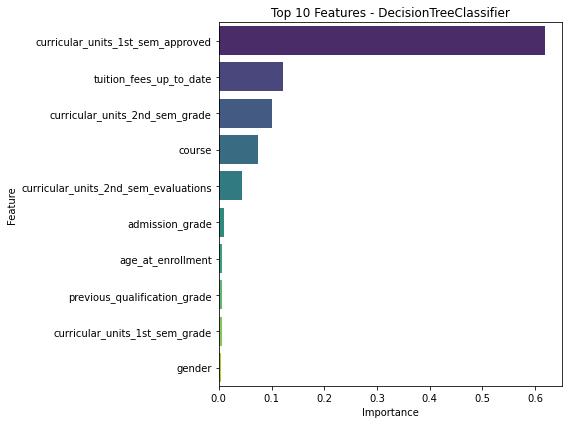


Model Evaluation Summary:
                                                                     Value
Training Time (s)                                                    0.066
Prediction Time (s)                                                    0.0
Train Accuracy                                                       0.892
Test Accuracy                                                        0.865
Overfitting Check                                                       No
Model Size (KB)                                                       0.05
Cross-Validation Score                                               0.875
Bias-Variance Trade-off                                              0.026
Accuracy                                                             0.865
Precision                                                            0.822
Recall                                                                0.95
F1-Score                                                             0.88

In [41]:
dt = DecisionTreeClassifier(
    criterion='entropy',     
    max_depth=5,             # Pruning to avoid overfitting
    min_samples_split=10,    # Node must have at least 10 samples to split
    min_samples_leaf=5,      # A leaf must have at least 5 samples
    random_state=42
)

# Run evaluation
evaluate_model(
    dt,
    X_train,
    X_test,
    y_train,
    y_test,
    feature_names=feature_names
)

## XGBoost

In [42]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size for each iteration
    max_depth=5,             # Maximum tree depth
    scale_pos_weight=1,      # Balance between classes
    eval_metric='logloss',   # Evaluation metric
    random_state=42
)


 Evaluating: XGBClassifier
Training Time: 0.513 seconds
Prediction taken: 0.000 seconds
Train Accuracy: 0.963
Test Accuracy:  0.898
Model Size: 0.05 KB
Cross-Validation (cv=5): 0.903
Bias-Variance Trade-off: 0.065
Accuracy: 0.898
Precision: 0.882
Recall: 0.930
F1-Score: 0.905
ROC-AUC: 0.8958366493098979

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       398
           1       0.88      0.93      0.91       442

    accuracy                           0.90       840
   macro avg       0.90      0.90      0.90       840
weighted avg       0.90      0.90      0.90       840



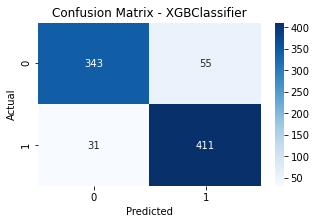

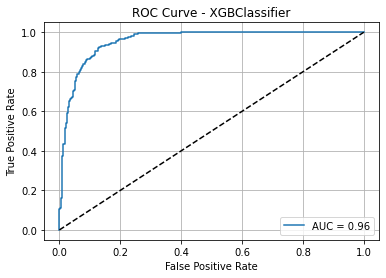

{'Feature': {23: 'curricular_units_1st_sem_approved', 15: 'tuition_fees_up_to_date', 21: 'curricular_units_1st_sem_enrolled', 28: 'curricular_units_2nd_sem_grade', 3: 'course', 16: 'gender', 14: 'debtor', 27: 'curricular_units_2nd_sem_evaluations', 17: 'scholarship_holder', 18: 'age_at_enrollment'}, 'Importance': {23: 0.39546942710876465, 15: 0.10938693583011627, 21: 0.050309035927057266, 28: 0.04678761586546898, 3: 0.03267470747232437, 16: 0.03248339146375656, 14: 0.03133372589945793, 27: 0.03048950806260109, 17: 0.026044415310025215, 18: 0.017996273934841156}}


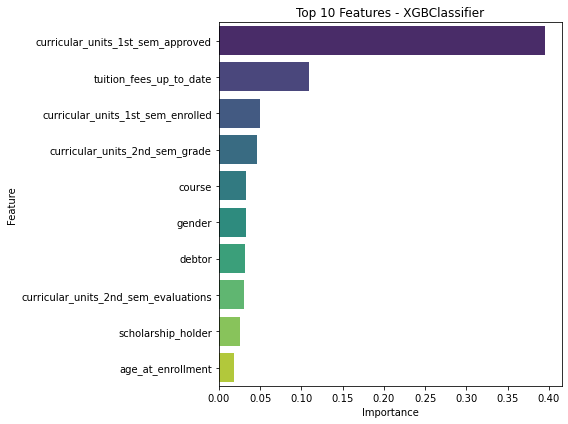


Model Evaluation Summary:
                                                                     Value
Training Time (s)                                                    0.513
Prediction Time (s)                                                    0.0
Train Accuracy                                                       0.963
Test Accuracy                                                        0.898
Overfitting Check                                                       No
Model Size (KB)                                                       0.05
Cross-Validation Score                                               0.903
Bias-Variance Trade-off                                              0.065
Accuracy                                                             0.898
Precision                                                            0.882
Recall                                                                0.93
F1-Score                                                             0.90

In [43]:
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, feature_names=feature_names)

## Support vector machine


 Evaluating: SVC
Training Time: 3.948 seconds
Prediction taken: 0.246 seconds
Train Accuracy: 0.926
Test Accuracy:  0.875
Model Size: 0.05 KB
Cross-Validation (cv=5): 0.896
Bias-Variance Trade-off: 0.051
Accuracy: 0.875
Precision: 0.845
Recall: 0.934
F1-Score: 0.887
ROC-AUC: 0.8717171832010733

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       398
           1       0.84      0.93      0.89       442

    accuracy                           0.88       840
   macro avg       0.88      0.87      0.87       840
weighted avg       0.88      0.88      0.87       840



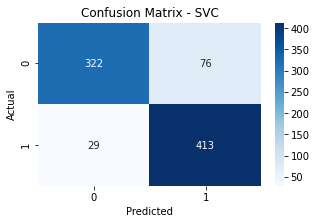

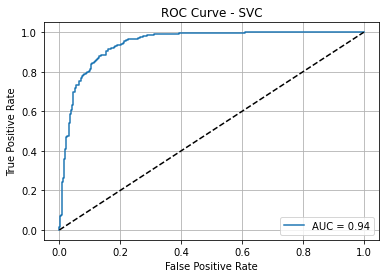

Feature importance not available for this model.
Number of Support Vectors: 1204

Model Evaluation Summary:
                                            Value
Training Time (s)                           3.948
Prediction Time (s)                         0.246
Train Accuracy                              0.926
Test Accuracy                               0.875
Overfitting Check                              No
Model Size (KB)                              0.05
Cross-Validation Score                      0.896
Bias-Variance Trade-off                     0.051
Accuracy                                    0.875
Precision                                   0.845
Recall                                      0.934
F1-Score                                    0.887
ROC-AUC                                  0.871717
cfmatrix                   [[322, 76], [29, 413]]
Number of Support Vectors                    1204


In [44]:
svm_model = SVC(
    kernel='rbf',            # Radial Basis Function for non-linearity
    C=1.0,                   # Regularization parameter
    probability=True,        # To use predict_proba for ROC
    random_state=42
)
evaluate_model(svm_model, X_train, X_test, y_train, y_test, feature_names=feature_names)

## Logisitc Regression


 Evaluating: LogisticRegression
Training Time: 0.029 seconds
Prediction taken: 0.000 seconds
Train Accuracy: 0.894
Test Accuracy:  0.885
Model Size: 0.05 KB
Cross-Validation (cv=5): 0.889
Bias-Variance Trade-off: 0.010
Accuracy: 0.885
Precision: 0.857
Recall: 0.937
F1-Score: 0.895
ROC-AUC: 0.8816423747697765

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       398
           1       0.86      0.94      0.90       442

    accuracy                           0.88       840
   macro avg       0.89      0.88      0.88       840
weighted avg       0.89      0.88      0.88       840



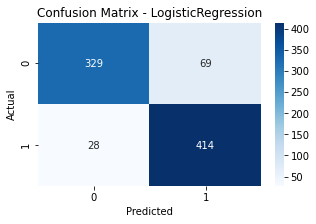

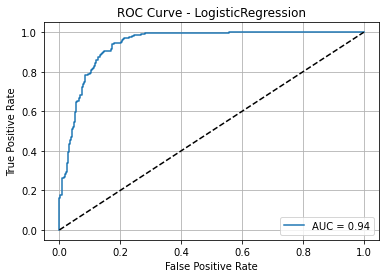

{'Feature': {23: 'curricular_units_1st_sem_approved', 28: 'curricular_units_2nd_sem_grade', 15: 'tuition_fees_up_to_date', 19: 'international', 17: 'scholarship_holder', 10: 'fathers_occupation', 0: 'marital_status', 5: 'previous_qualification', 22: 'curricular_units_1st_sem_evaluations', 2: 'application_order'}, 'Importance': {23: 2.586472437717506, 28: 1.4042726774359406, 15: 0.9912877794818944, 19: 0.5633887363340715, 17: 0.39031986734400564, 10: 0.17070583443631523, 0: 0.1665044787404067, 5: 0.15929918514799946, 22: 0.054996325565694074, 2: 0.049120889588434594}}


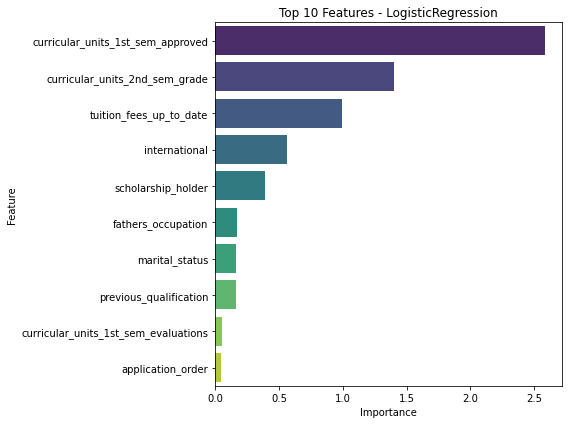


Feature Coefficients:
                                              Coefficient
curricular_units_1st_sem_approved                2.586472
curricular_units_2nd_sem_grade                   1.404273
tuition_fees_up_to_date                          0.991288
international                                    0.563389
scholarship_holder                               0.390320
fathers_occupation                               0.170706
marital_status                                   0.166504
previous_qualification                           0.159299
curricular_units_1st_sem_evaluations             0.054996
application_order                                0.049121
fathers_qualification                            0.048877
curricular_units_1st_sem_without_evaluations     0.000000
curricular_units_2nd_sem_without_evaluations     0.000000
curricular_units_1st_sem_credited                0.000000
curricular_units_2nd_sem_credited                0.000000
educational_special_needs                       -

In [45]:
log_reg_model = LogisticRegression(
    penalty='l2',          # L2 regularization (Ridge)
    C=1.0,                 # Inverse of regularization strength
    solver='liblinear',    # Suitable for small to medium-sized datasets
    random_state=42
)
evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, feature_names=X.columns)


In [46]:
# Building the Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularization
    Dense(64, activation='relu'),
    Dropout(0.3),  # Regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, 
                    batch_size=32, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_pred = (nn_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/50
105/105 [==============================] - 2s 9ms/step - loss: 0.4358 - accuracy: 0.8141 - val_loss: 0.3214 - val_accuracy: 0.8690
Epoch 2/50
105/105 [==============================] - 0s 5ms/step - loss: 0.3148 - accuracy: 0.8767 - val_loss: 0.2923 - val_accuracy: 0.8798
Epoch 3/50
105/105 [==============================] - 1s 5ms/step - loss: 0.2924 - accuracy: 0.8838 - val_loss: 0.2931 - val_accuracy: 0.8750
Epoch 4/50
105/105 [==============================] - 1s 5ms/step - loss: 0.2748 - accuracy: 0.8951 - val_loss: 0.2858 - val_accuracy: 0.8857
Epoch 5/50
105/105 [==============================] - 1s 5ms/step - loss: 0.2695 - accuracy: 0.8945 - val_loss: 0.2845 - val_accuracy: 0.8833
Epoch 6/50
105/105 [==============================] - 1s 8ms/step - loss: 0.2659 - accuracy: 0.8963 - val_loss: 0.2853 - val_accuracy: 0.8810
Epoch 7/50
105/105 [==============================] - 1s 8ms/step - loss: 0.2571 - accuracy: 0.9014 - val_loss: 0.2826 - val_accuracy: 0.8798
Epoch 

In [47]:
def evaluate_nn_model(
    model, X_train, X_test, y_train, y_test,
    cv=5, explained_variance=None
):
    print(f"\nEvaluating Neural Network")
    results = {}  # Dictionary to hold results
    
    # Time tracking
    start = time.time()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                        validation_split=0.2, verbose=0)
    end = time.time()
    training_time = end - start
    print(f"Training Time: {training_time:.3f} seconds")
    results['Training Time (s)'] = round(training_time, 3)
    
    # Accuracy on train and test
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy:  {test_acc:.3f}")
    results['Train Accuracy'] = round(train_acc, 3)
    results['Test Accuracy'] = round(test_acc, 3)
    
    if train_acc - test_acc > 0.1:
        print("Likely Overfitting: High train accuracy but lower test accuracy.")
        results['Overfitting Check'] = 'Yes'
    else:
        results['Overfitting Check'] = 'No'

    # Predictions
    start = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    end = time.time()
    prediction_time = end - start
    print(f"Prediction taken: {prediction_time:.3f} seconds")
    results['Prediction Time (s)'] = round(prediction_time, 3)
    
    # Memory Usage and Model Size
    model_size = sys.getsizeof(model) / 1024  # Size in KB
    print(f"Model Size: {model_size:.2f} KB")
    results['Model Size (KB)'] = round(model_size, 2)
    
     # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred) if hasattr(model, "predict_proba") else "N/A"

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {auc}")
    results['Accuracy'] = round(accuracy, 3)
    results['Precision'] = round(precision, 3)
    results['Recall'] = round(recall, 3)
    results['F1-Score'] = round(f1, 3)
    results['ROC-AUC'] = auc if auc != "N/A" else "Not Available"
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cfmatrix = confusion_matrix(y_test, y_pred)
    results['cfmatrix'] = cfmatrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cfmatrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - Neural Network")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    y_scores = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve - Neural Network")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


    # Training history plot
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Training Loss plot
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
    print("\nModel Evaluation Summary:")
    print(results_df)


Evaluating Neural Network
Training Time: 19.710 seconds
Train Accuracy: 0.955
Test Accuracy:  0.879
27/27 [==============================] - 0s 2ms/step
Prediction taken: 0.174 seconds
Model Size: 0.05 KB
Accuracy: 0.879
Precision: 0.863
Recall: 0.914
F1-Score: 0.888
ROC-AUC: N/A

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       398
           1       0.86      0.91      0.89       442

    accuracy                           0.88       840
   macro avg       0.88      0.88      0.88       840
weighted avg       0.88      0.88      0.88       840



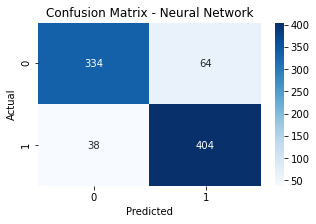

27/27 [==============================] - 0s 2ms/step


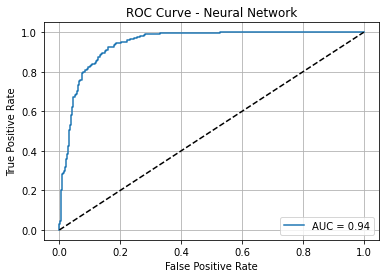

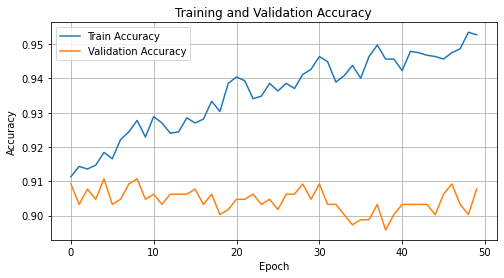

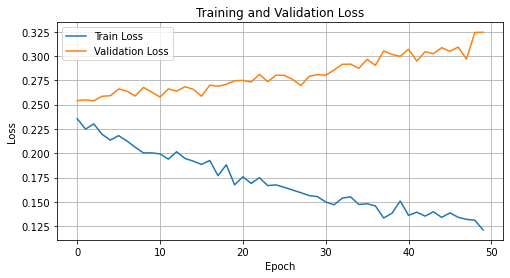


Model Evaluation Summary:
                                      Value
Training Time (s)                     19.71
Train Accuracy                        0.955
Test Accuracy                         0.879
Overfitting Check                        No
Prediction Time (s)                   0.174
Model Size (KB)                        0.05
Accuracy                              0.879
Precision                             0.863
Recall                                0.914
F1-Score                              0.888
ROC-AUC                       Not Available
cfmatrix             [[334, 64], [38, 404]]


In [48]:
evaluate_nn_model(nn_model, X_train, X_test, y_train, y_test)